In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import pandas as pd
import numpy as np

# 깃허브에 준비된 데이터를 가져옵니다.
!git clone https://github.com/taehojo/data.git

# 와인 데이터를 불러옵니다.
df = pd.read_csv('./data/wine.csv', header=None)

# 데이터를 미리 보겠습니다.
df

Cloning into 'data'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 3), reused 20 (delta 2), pack-reused 0
Receiving objects: 100% (21/21), 460.95 KiB | 4.61 MiB/s, done.
Resolving deltas: 100% (3/3), done.


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [2]:
# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

In [3]:
# 학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다. (검증데이터 분리)
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25) # 0.8 x 0.25 = 0.2

Epoch 1/50
8/8 [==============================] - 3s 75ms/step - loss: 0.5830 - accuracy: 0.7090 - val_loss: 0.5092 - val_accuracy: 0.7815
Epoch 2/50
8/8 [==============================] - 0s 10ms/step - loss: 0.4912 - accuracy: 0.7868 - val_loss: 0.4082 - val_accuracy: 0.8000
Epoch 3/50
8/8 [==============================] - 0s 7ms/step - loss: 0.3701 - accuracy: 0.8209 - val_loss: 0.3631 - val_accuracy: 0.8569
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 0.3571 - accuracy: 0.8578 - val_loss: 0.3248 - val_accuracy: 0.8531
Epoch 5/50
8/8 [==============================] - 0s 13ms/step - loss: 0.3297 - accuracy: 0.8399 - val_loss: 0.3154 - val_accuracy: 0.8538
Epoch 6/50
8/8 [==============================] - 0s 13ms/step - loss: 0.3122 - accuracy: 0.8578 - val_loss: 0.2954 - val_accuracy: 0.8838
Epoch 7/50
8/8 [==============================] - 0s 12ms/step - loss: 0.3007 - accuracy: 0.8899 - val_loss: 0.2841 - val_accuracy: 0.8915
Epoch 8/50
8/8 [=============

In [5]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 3ms/step - loss: 0.1560 - accuracy: 0.9462
Test accuracy: 0.9461538195610046


# 그래프로 과적합 확인하기

In [6]:
# 그래프 확인을 위한 긴 학습
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25)

Epoch 1/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1795 - accuracy: 0.9405 - val_loss: 0.1697 - val_accuracy: 0.9431
Epoch 2/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.1784 - accuracy: 0.9407 - val_loss: 0.1685 - val_accuracy: 0.9454
Epoch 3/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.1783 - accuracy: 0.9418 - val_loss: 0.1676 - val_accuracy: 0.9431
Epoch 4/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.1773 - accuracy: 0.9405 - val_loss: 0.1668 - val_accuracy: 0.9454
Epoch 5/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.1757 - accuracy: 0.9410 - val_loss: 0.1665 - val_accuracy: 0.9454
Epoch 6/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.1757 - accuracy: 0.9418 - val_loss: 0.1654 - val_accuracy: 0.9446
Epoch 7/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.1748 - accuracy: 0.9418 - val_loss: 0.1643 - val_accuracy: 0.9446
Epoch 8/2000
8/8

In [7]:
# history에 저장된 학습 결과를 확인해 보겠습니다.
hist_df=pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.179537,0.940467,0.169688,0.943077
1,0.178381,0.940724,0.168506,0.945385
2,0.178289,0.941750,0.167607,0.943077
3,0.177277,0.940467,0.166778,0.945385
4,0.175708,0.940980,0.166460,0.945385
...,...,...,...,...
1995,0.019820,0.994611,0.041236,0.990769
1996,0.020248,0.994868,0.039842,0.990000
1997,0.022114,0.992302,0.048418,0.985385
1998,0.021290,0.994868,0.045592,0.986154


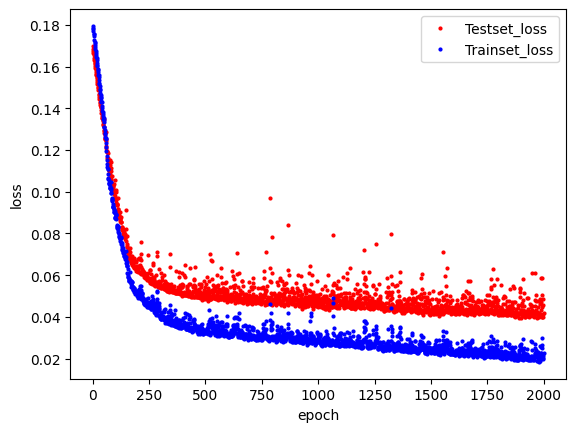

In [9]:
import matplotlib.pyplot as plt
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist_df['loss']

#x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 학습의 자동 중단

In [10]:
# 깃허브에 준비된 데이터를 가져옵니다. 앞에서 이미 데이터를 가져왔으므로 주석 처리합니다. 2번 예제만 별도 실행 시 주석을 해제한 후 실행해주세요.
# !git clone https://github.com/taehojo/data.git

# 와인 데이터를 불러옵니다.
# df = pd.read_csv('./data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

In [11]:
# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

In [12]:
# 학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [13]:
# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                390       
                                                                 
 dense_5 (Dense)             (None, 12)                372       
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### 학습의 자동 중단 및 최적화 모델 저장

In [15]:
# 학습이 언제 자동 중단될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# 최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="./data/model/Ch14-4-bestmodel.hdf5"

In [16]:
# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

In [17]:
# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/2000
8/8 [==============================] - 2s 55ms/step - loss: 1.4746 - accuracy: 0.7552 - val_loss: 1.0932 - val_accuracy: 0.7600
Epoch 2/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.9109 - accuracy: 0.7575 - val_loss: 0.5782 - val_accuracy: 0.7785
Epoch 3/2000
1/8 [==>...........................] - ETA: 0s - loss: 0.5452 - accuracy: 0.7740

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 0s 12ms/step - loss: 0.4874 - accuracy: 0.7993 - val_loss: 0.4671 - val_accuracy: 0.8269
Epoch 4/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.4765 - accuracy: 0.8191 - val_loss: 0.4469 - val_accuracy: 0.8315
Epoch 5/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.4115 - accuracy: 0.8158 - val_loss: 0.3749 - val_accuracy: 0.8262
Epoch 6/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3886 - accuracy: 0.8155 - val_loss: 0.3673 - val_accuracy: 0.8346
Epoch 7/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3729 - accuracy: 0.8273 - val_loss: 0.3518 - val_accuracy: 0.8485
Epoch 8/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3600 - accuracy: 0.8383 - val_loss: 0.3473 - val_accuracy: 0.8546
Epoch 9/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3508 - accuracy: 0.8509 - val_loss: 0.3356 - val_accuracy: 0.8608
Epoch 10/2000
8/8 [=======

In [18]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 3ms/step - loss: 0.0414 - accuracy: 0.9877
Test accuracy: 0.9876922965049744
